# SENTIMENT REPORT

We load the files extracted from Pybossa with the annotated data.

In [1]:
from pybossa import *
import pandas as pd

filewithids = 'csv/tweets.csv'

taskjsonpath= 'fts_task.json'

taskrunjsonpath = 'fts_task_run.json'

numberofcategories = 3

goldencsvpath = 'csv/Golden.csv'

With these documents we generate the report files executing the function pybossaReport.
This function returns the Fleiss` kappa of the sentiment project

In [2]:
# Si no hay golden poner None
pybossaReport(filewithids, taskjsonpath, taskrunjsonpath, numberofcategories, goldencsvpath)

0.602169024942


Here is presented each user with its Golden trust and Majority trust.

In [3]:
usertweetinfo = pd.read_csv('usertweetinfo.csv', encoding="utf-8")
usertweetinfo = usertweetinfo[['User','Golden trust','Majority trust']]
usertweetinfo[572:574]

,User,Golden trust,Majority trust
572,1,1.000000,0.606742
573,2,0.888889,0.650437


## MAJORITY REPORT

We load the majority report generated in pybossaReport.

In [4]:
majoritypercent = pd.read_csv('majoritypercent.csv', encoding="utf-8")

majoritypercent[:5]

,id_str,Tweet,Neutro,Negativo,Positivo
0,"9,71414330725069E+017",@AS_Manolete Y con el atleti podemos soñar otr...,0.517378,0.482622,0.0
1,"9,71414177666478E+017",@eSports_Barca @MNDZPAU1 Md,1.000000,0.000000,0.0
2,"9,71414161606501E+017",Ahhhh claro que es del Atleti https://t.co/xm4...,1.000000,0.000000,0.0
3,"9,71414116270305E+017",Que venga Arthur me tiene más emocionado que c...,0.000000,0.000000,1.0
4,"9,7141400299889E+017",Me ha gustado un vídeo de @YouTube (https://t....,0.000000,0.000000,1.0


We create the column sentiment with the most chosen answer according to the user`s majority confidence.

In [5]:
majoritypercent['Sentiment'] = 0
majoritypercent.loc[majoritypercent["Sentiment"] == 0, "Sentiment"] = ((majoritypercent.Positivo > majoritypercent.Negativo) & (majoritypercent.Positivo > majoritypercent.Neutro)).astype(int)
majoritypercent.loc[majoritypercent["Sentiment"] == 0, "Sentiment"] = ((majoritypercent.Negativo > majoritypercent.Positivo) & (majoritypercent.Negativo > majoritypercent.Neutro)).astype(int)+2 
majoritypercent.loc[majoritypercent["Sentiment"] == 1, "Sentiment"] = "Positive"
majoritypercent.loc[majoritypercent["Sentiment"] == 2, "Sentiment"] = "Neutral"
majoritypercent.loc[majoritypercent["Sentiment"] == 3, "Sentiment"] = "Negative"

We create the column FullAgreement to identify in which tweets it has been full agreement in the chosen answer.

In [6]:
majoritypercent['FullAgreement']=0
majoritypercent.FullAgreement = ((majoritypercent.Positivo == 1) | (majoritypercent.Negativo == 1) | (majoritypercent.Neutro == 1)).astype(int)

These are the columns we are interested for the sentiment golden report.

In [7]:
majority1 = majoritypercent[['Tweet','Positivo','Negativo','Neutro','Sentiment','FullAgreement']]
majority1[:5]

,Tweet,Positivo,Negativo,Neutro,Sentiment,FullAgreement
0,@AS_Manolete Y con el atleti podemos soñar otr...,0.0,0.482622,0.517378,Neutral,0
1,@eSports_Barca @MNDZPAU1 Md,0.0,0.000000,1.000000,Neutral,1
2,Ahhhh claro que es del Atleti https://t.co/xm4...,0.0,0.000000,1.000000,Neutral,1
3,Que venga Arthur me tiene más emocionado que c...,1.0,0.000000,0.000000,Positive,1
4,Me ha gustado un vídeo de @YouTube (https://t....,1.0,0.000000,0.000000,Positive,1


The number of tweets where it has been full agreement.

In [8]:
import seaborn as sns
majority1.groupby('FullAgreement').size()

FullAgreement
0    202
1    599
dtype: int64

Full agreement graphic.

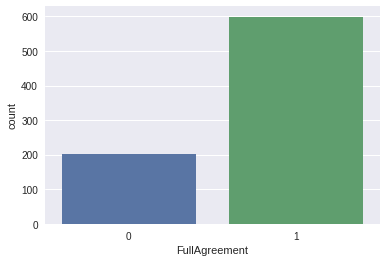

In [9]:
sns.countplot('FullAgreement', data=majority1)

The number of chosen answers.

In [10]:
majority1.groupby('Sentiment').size()

Sentiment
Negative    225
Neutral     369
Positive    207
dtype: int64

Chosen answers graphic.

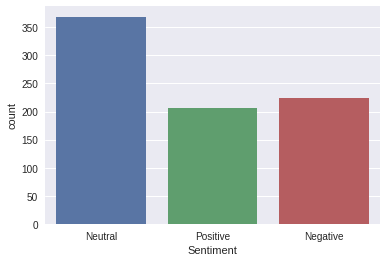

In [11]:
sns.countplot('Sentiment', data=majority1)

## GOLDEN REPORT

We load the golden report generated in pybossaReport.

In [12]:
goldenpercentage = pd.read_csv('goldenpercent.csv', encoding="utf-8")
goldenpercentage[:5]

,id_str,Tweet,Neutro,Negativo,Positivo
0,"9,71414330725069E+017",@AS_Manolete Y con el atleti podemos soñar otr...,0.470588,0.529412,0.0
1,"9,71414177666478E+017",@eSports_Barca @MNDZPAU1 Md,1.000000,0.000000,0.0
2,"9,71414161606501E+017",Ahhhh claro que es del Atleti https://t.co/xm4...,1.000000,0.000000,0.0
3,"9,71414116270305E+017",Que venga Arthur me tiene más emocionado que c...,0.000000,0.000000,1.0
4,"9,7141400299889E+017",Me ha gustado un vídeo de @YouTube (https://t....,0.000000,0.000000,1.0


We create the column sentiment with the most chosen answer according to the user`s golden confidence.

In [13]:
goldenpercentage['Sentiment'] = 0
goldenpercentage.loc[goldenpercentage["Sentiment"] == 0, "Sentiment"] = ((goldenpercentage.Positivo > goldenpercentage.Negativo) & (goldenpercentage.Positivo > goldenpercentage.Neutro)).astype(int)
goldenpercentage.loc[goldenpercentage["Sentiment"] == 0, "Sentiment"] = ((goldenpercentage.Negativo > goldenpercentage.Positivo) & (goldenpercentage.Negativo > goldenpercentage.Neutro)).astype(int)+2 
goldenpercentage.loc[goldenpercentage["Sentiment"] == 1, "Sentiment"] = "Positive"
goldenpercentage.loc[goldenpercentage["Sentiment"] == 2, "Sentiment"] = "Neutral"
goldenpercentage.loc[goldenpercentage["Sentiment"] == 3, "Sentiment"] = "Negative"

We create the column FullAgreement to identify in which tweets it has been full agreement in the chosen answer.

In [14]:
goldenpercentage['FullAgreement']=0
goldenpercentage.FullAgreement = ((goldenpercentage.Positivo == 1) | (goldenpercentage.Negativo == 1) | (goldenpercentage.Neutro == 1)).astype(int)

These are the columns we are interested for the sentiment golden report.

In [15]:
goldenpercentage1 = goldenpercentage[['Tweet','Positivo','Negativo','Neutro','Sentiment','FullAgreement']]
goldenpercentage1[:5]

,Tweet,Positivo,Negativo,Neutro,Sentiment,FullAgreement
0,@AS_Manolete Y con el atleti podemos soñar otr...,0.0,0.529412,0.470588,Negative,0
1,@eSports_Barca @MNDZPAU1 Md,0.0,0.000000,1.000000,Neutral,1
2,Ahhhh claro que es del Atleti https://t.co/xm4...,0.0,0.000000,1.000000,Neutral,1
3,Que venga Arthur me tiene más emocionado que c...,1.0,0.000000,0.000000,Positive,1
4,Me ha gustado un vídeo de @YouTube (https://t....,1.0,0.000000,0.000000,Positive,1


The number of tweets where it has been full agreement.

In [16]:
goldenpercentage1.groupby('FullAgreement').size()

FullAgreement
0    202
1    599
dtype: int64

Full agreement graphic.

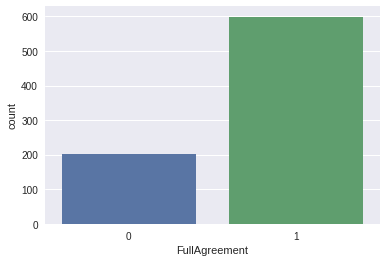

In [17]:
sns.countplot('FullAgreement', data=goldenpercentage1)

The number of chosen answers.

In [18]:
goldenpercentage1.groupby('Sentiment').size()

Sentiment
Negative    257
Neutral     408
Positive    136
dtype: int64

Chosen agreement graphic.

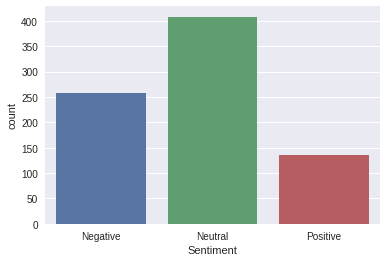

In [19]:
sns.countplot('Sentiment', data=goldenpercentage1)